In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import IPython
%matplotlib inline

In [2]:
#loading data
data_dicts = pickle.load(open('pe_data_dicts', 'r'))

In [3]:
#plotting and returning histogram of target states per grasp
def plot_save_hist(data, nbins=10, show=False, save_file = None, xlabel=None, ylabel=None, title=None):
    plt.clf()
    n, bins, patches = plt.hist(data, bins=nbins, alpha=0.75)

    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    
    if save_file is not None:
        plt.savefig(save_file)
    if show:
        plt.show()

In [4]:
def ensure_dir_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [5]:
#plotting and saving distributions of target states per object per grasp
def gen_hist_target_states(obj_name, grasps, desired_states, root_dir):
    for grasp_id in grasps:
        for state in desired_states:
            data = grasps[grasp_id]['target_states'][state]
            
            title = 'Target_State_Obj_{0}_Grasp_{1}_State_{2}'.format(obj_name, grasp_id, state)
            dest_dir = os.path.join(root_dir, obj_name, str(grasp_id))
            fig_file = os.path.join(dest_dir, title+'.png')

            ensure_dir_exists(dest_dir)
            plot_save_hist(data, 5, save_file=fig_file, xlabel=state, title=title)

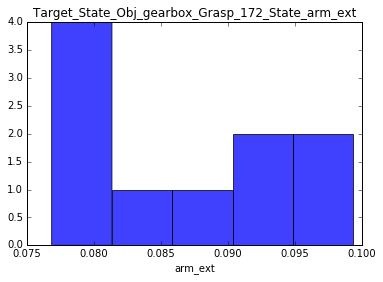

In [16]:
desired_target_states = ['arm_elev', 'arm_rot', 'arm_ext']
#generating all target states graphs:
for obj_name in data_dicts:
    gen_hist_target_states(obj_name, data_dicts[obj_name]['grasps'], desired_target_states, 'graphs')

In [26]:
def gen_hist_diff_states(data, desired_states, root_dir):
    diffs = {state:[] for state in desired_states}
    print diffs
    for obj_name in data:
        for grasp_id, grasp in data[obj_name]['grasps'].items():
            for state in desired_states:
                target_vals = grasp['target_states'][state]
                actual_vals = grasp['actual_states'][state]
                diff = [actual_vals[i] - target_vals[i] for i in range(len(actual_vals))]
                diffs[state].extend(diff)
    
    print len(diffs['arm_ext'])
    for state, diff in diffs.items():
        title = 'Diff_of_Actual_and_Target_States_{0}'.format(state)
        dest_dir = os.path.join(root_dir, 'diffs')
        fig_file = os.path.join(dest_dir, title+'.png')

        ensure_dir_exists(dest_dir)
        plot_save_hist(diff, 10, save_file=fig_file, xlabel=state, title=title)

{'gripper_rot': [], 'arm_ext': [], 'arm_rot': [], 'gripper_grip': [], 'arm_elev': []}
362


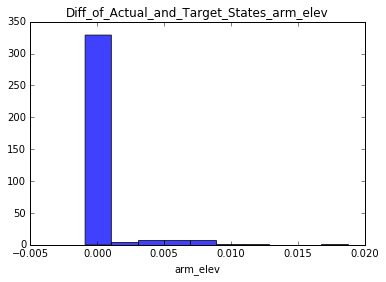

In [27]:
desired_diff_states = ['arm_elev', 'arm_rot', 'arm_ext', 'gripper_rot', 'gripper_grip']
gen_hist_diff_states(data_dicts, desired_diff_states, 'graphs')

In [7]:
print len(data_dicts.keys())

7


In [10]:
print len(data_dicts['endstop_holder']['grasps'].keys())

10


In [16]:
print len(data_dicts['endstop_holder']['grasps'][99]['target_states']['arm_ext'])

10
